# 03 Build Models

## Imports

* We want AUC ROC

In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier





from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


# Functions

In [2]:
def get_metrics(y_true, y_predict, print_scores = True):
    matrix_def = [['tn','fp'], ['fn','tp']]
    matrix = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = matrix.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    misclass = 1-accuracy
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)
    if print_scores:
        print('Matrix Definition')
        print(np.array(matrix_def))
        print('')
        print('Confusion Matrix')
        print(matrix)
        print('')
        print('METRICS')
        print('accuracy:', accuracy)
        print('misclass:', misclass)
        print('sensitivity:', sensitivity)
        print('specificity:', specificity)
    else:
        return accuracy, misclass, sensitivity, specificity, precision

## Read in Train and Test Data

In [3]:
with open('../Cleansed_Data/X_train_ss.pkl','rb') as f:
    X_train_ss = pickle.load(f)
    
with open('../Cleansed_Data/X_test_ss.pkl','rb') as f:
    X_test_ss = pickle.load(f)
    
with open('../Cleansed_Data/y_train.pkl','rb') as f:
    y_train = pickle.load(f)
    
with open('../Cleansed_Data/y_test.pkl','rb') as f:
    y_test = pickle.load(f)

In [4]:
print([column for column in X.columns])

NameError: name 'X' is not defined

## Try Simple Logistic Regression

In [4]:
lr = LogisticRegression()
lr.fit(X_train_ss, y_train)
lr.score(X_train_ss, y_train), lr.score(X_test_ss, y_test)

get_metrics(lr.predict(X_test_ss), y_test)

Matrix Definition
[['tn' 'fp']
 ['fn' 'tp']]

Confusion Matrix
[[1998  100]
 [   7   14]]

METRICS
accuracy: 0.9495044832468146
misclass: 0.05049551675318542
sensitivity: 0.6666666666666666
specificity: 0.9523355576739753


## Try Neural Net

In [5]:
# Check number of inputs
print(X_train_ss.shape[1])
layer1 = X_train_ss.shape[1]
layer2 = 6

167


In [6]:
model = Sequential()
model.add(Dense(layer1, activation='relu', input_dim=X_train_ss.shape[1])) #Makes this dynamic
model.add(Dropout(.4))
model.add(Dense(layer2, activation='relu')) #Makes this dynamic
model.add(Dense(1, activation='sigmoid'))

In [7]:
adam = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  #mean_squared_error

In [8]:
history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=70, batch_size=32, verbose=0)

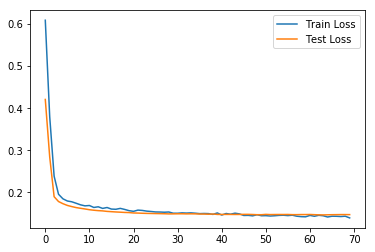

In [9]:
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

plt.legend()

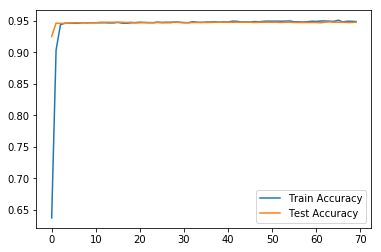

In [10]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend()

In [11]:
roc_auc_score(y_test, model.predict(X_test_ss))

0.893748085925537

------------
-----------

# Modeling:

#### Importing Data:

In [2]:
with open('../Cleansed_Data/X.pkl', 'rb') as f:
    X = pickle.load(f)
    
with open('../Cleansed_Data/y.pkl', 'rb') as f:
    y = pickle.load(f)

## Preparing the Data with Train/Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.30, 
                                                    stratify=y, 
                                                    random_state=42)

## Scaling + Fitting: 

In [4]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Support Vector Machine:

In [8]:
clf = svm.SVC(gamma=0.25, 
              random_state=42)
cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=5).mean()

0.613065547902153

In [9]:
svc = svm.SVC(
              kernel='linear',
              random_state=42)
cross_val_score(svc, X_train, y_train, scoring='roc_auc', cv=5).mean()

0.8598011462842241

In [10]:
poly_svc = svm.SVC( 
              kernel='poly', 
              degree=1, 
              gamma=0.35, 
              random_state=42)
cross_val_score(poly_svc, X_train, y_train, scoring='roc_auc', cv=5).mean()

0.8589523730442554

In [11]:
poly_svc = svm.SVC( 
              kernel='sigmoid', 
              random_state=42)
cross_val_score(poly_svc, X_train, y_train, scoring='roc_auc', cv=5).mean()

0.644944552843399

## Support Vector Machine w/ Principal Component Analysis

### Scaling and fitting the data using PCA:

In [12]:
pca = PCA()
ss = StandardScaler()
Xs = pca.fit_transform(X)

pca = PCA(n_components=2)
Xt = pca.fit_transform(Xs)

### Sigmoid - Support Vector Machine w/ Principal Component Analysis

In [13]:
poly_svc = svm.SVC( 
              kernel='sigmoid', 
              random_state=42)

cross_val_score(poly_svc, Xt, y, scoring='roc_auc', cv=5).mean()

0.5219595187102339

### Sigmoid - Support Vector Machine w/ Principal Component Analysis

In [ ]:
poly_svc = svm.SVC( 
              kernel='poly', 
              degree=1, 
              gamma=0.35, 
              random_state=42)
cross_val_score(poly_svc, Xt, y, scoring='accuracy', cv=5).mean()

--------

## Random Forest

In [5]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=3)

In [6]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
rf.score(X_train, y_train)

0.9575185434929198

In [8]:
rf.score(X_test, y_test)

0.9480928037750688

In [9]:
y_test.mean()

0.05387337790011797

In [10]:
rf.predict(X_test).mean()

0.01061738104600865

In [11]:
rf.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.98958087, 0.01041913],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.98045643, 0.01954357]])

In [12]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.8931579202844471

In [13]:
X_test.shape

(2543, 167)

## Look at Feature Importances

In [14]:
feat_imp = pd.DataFrame(rf.feature_importances_, index=X.columns).sort_values(0, ascending=False)

In [15]:
feat_imp.head(20)

0
NumMosquitos                    0.299804
Longitude                       0.180118
Latitude                        0.168003
Species_CULEX PIPIENS           0.020916
Species_CULEX PIPIENS/RESTUANS  0.020322
Species_CULEX RESTUANS          0.011955
DewPointC_1_back                0.010203
DewPointC_8_back                0.008725
photoperiod_2_back              0.008484
Month_08                        0.008148
photoperiod_4_back              0.007938
photoperiod_1_back              0.007876
photoperiod                     0.007060
photoperiod_7_back              0.006962
TminC_2_back                    0.006779
photoperiod_5_back              0.006240
photoperiod_3_back              0.005462
DewPointC                       0.005311
DewPointC_2_back                0.004978
photoperiod_10_back             0.004590

## Import Kaggle Test Data

In [16]:
kaggle_X = pd.read_csv('../Cleansed_Data/test_final.csv')

In [17]:
X.columns

Index(['Latitude', 'Longitude', 'NumMosquitos', 'BR', 'HZ', 'RA', 'TSRA',
       'VCTS', 'FU', 'TS',
       ...
       'Month_08', 'Month_09', 'Month_10', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS'],
      dtype='object', length=167)

In [18]:
kaggle_X.NumMosquitos.value_counts()

-0.16018    116293
Name: NumMosquitos, dtype: int64

In [19]:
kaggle_X.columns

Index(['Id', 'Latitude', 'Longitude', 'BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU',
       'TS',
       ...
       'Month_10', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Month_05', 'NumMosquitos'],
      dtype='object', length=168)

In [20]:
kaggle_X = kaggle_X[X.columns]

In [21]:
preds = rf.predict_proba(kaggle_X)[:,1]

In [22]:
submission_df = pd.DataFrame(preds, index=kaggle_X.index, columns=['WnvPresent'])

In [23]:
submission_df.to_csv('../Cleansed_Data/rf_test.csv')

In [24]:
submission_df.WnvPresent.mean()

0.04109916931264502

In [29]:
submission_df.describe()

WnvPresent
count  116293.000000
mean        0.041099
std         0.028155
min         0.001273
25%         0.018860
50%         0.033414
75%         0.056272
max         0.198809

In [33]:
indecies = submission_df[submission_df.WnvPresent > .1].index

In [42]:
locations_df = pd.read_csv("../west_nile/west_nile/input/test.csv")

In [49]:
spray_df = locations_df.loc[indecies, ['Latitude', 'Longitude', 'Date']]

In [51]:
spray_df.to_csv('../Cleansed_Data/predicted_spray.csv')

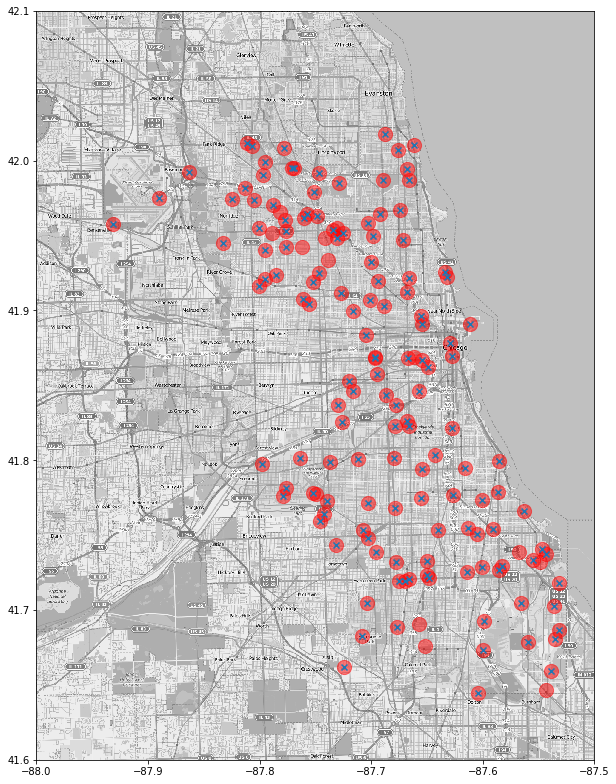

In [50]:
df = pd.read_csv('../west_nile/west_nile/input/train.csv')
mapdata = np.loadtxt("../west_nile/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
sprays = spray_df[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=.5, s=200)
plt.scatter(locations[:,0], locations[:,1], marker='x')

In [27]:
# ada = AdaBoostClassifier()

In [194]:
# params = {}

In [195]:
# gs = GridSearchCV(ada, params)

In [196]:
# gs.fit(X_train, y_train)

In [197]:
# gs.score(X_train_tf, y_train)

In [198]:
# gs.score(X_test_tf, y_test)

In [21]:
with open('../Cleansed_Data/X.pkl', 'rb') as f:
    X = pickle.load(f)
    
with open('../Cleansed_Data/y.pkl', 'rb') as f:
    y = pickle.load(f)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=30, 
                                                    stratify=y, 
                                                    random_state=42)

In [28]:
rf_tf_pipe = Pipeline([
    ('pca', PCA()),
    ('tfidf', TfidfVectorizer(stop_words='english', 
                              encoding='unicode-escape')),
    ('rf', RandomForestClassifier())
])

In [29]:
rf_tf_params = {
    'tfidf__min_df': list(range(1,6)),
    'tfidf__max_df': list(np.linspace(.5, 1, 10)),
    'rf__max_depth': list(np.linspace(5, 500, 10)),
    'rf__min_samples_leaf': list(range(1,10)),
    'rf__n_estimators': [10, 50, 100],
}

In [30]:
grid = GridSearchCV(rf_tf_pipe, 
                    rf_tf_params,
                        n_jobs=3,)

In [ ]:
grid.fit(X_train, y_train)

In [172]:
# grid.score(X_train, y_train)

In [173]:
# grid.score(X_test, y_test)

In [51]:
X_train.shape

(8445, 167)

--------

# Neural Network - Regression Model:

### Importing the Data:

In [7]:
with open('../Cleansed_Data/X.pkl', 'rb') as f:
    X = pickle.load(f)
    
with open('../Cleansed_Data/y.pkl', 'rb') as f:
    y = pickle.load(f)

In [8]:
X.shape

(8475, 167)

### Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=30, 
                                                    stratify=y, 
                                                    random_state=42)

### Scaling and Fitting:

In [10]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape[1]

167

In [11]:
# pca = PCA()
# ss = StandardScaler()
# Xs = pca.fit_transform(X_train)

# pca = PCA(n_components=2)
# X_train = pca.fit_transform(Xs)

### Creating a Regression Model:

In [24]:
model = Sequential()

# n_input = X_train.shape[1]
# n_hidden = n_input
# n_output = 1

# model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
# model.add(Dense(n_output, activation='sigmoid'))
# model.add(Dropout(.4))
# model.add(Dense(n_output, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))


model.add(Dense(42, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

###  Compiling the Model:

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam')

###  Fitting the Model:

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

In [31]:
model.predict(X_test).mean()

0.059175123

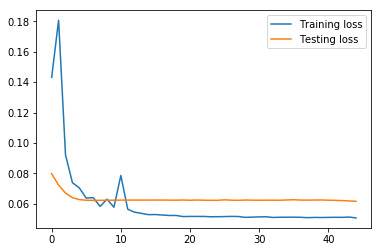

In [41]:
train_loss = history.history['loss'][5:]
test_loss = history.history['val_loss'][5:]
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend();

In [44]:
last_step = 0
for i, step in enumerate(history.history['val_loss']):
    print(f'{i}: {last_step - step}')
    last_step = step

0: -0.1396215260028839
1: 0.0045127421617507935
2: 0.017387226223945618
3: 0.014932557940483093
4: 0.0129198357462883
5: 0.010115616023540497
6: 0.007514946162700653
7: 0.0051797181367874146
8: 0.0030300766229629517
9: 0.001272149384021759
10: 0.00044927746057510376
11: 8.455663919448853e-05
12: -5.4605305194854736e-05
13: -5.634501576423645e-05
14: -1.4666467905044556e-05
15: -6.775557994842529e-05
16: 9.585171937942505e-06
17: -4.073604941368103e-05
18: 2.1319836378097534e-05
19: -1.8812716007232666e-05
20: -4.757195711135864e-06
21: -3.069639205932617e-06
22: 4.9591064453125e-05
23: 3.750249743461609e-05
24: -0.00011801719665527344
25: 0.00015846267342567444
26: -0.00014511868357658386
27: 0.00011818483471870422
28: 7.127970457077026e-05
29: -6.381422281265259e-06
30: -0.00031665340065956116
31: 0.00026052072644233704
32: 6.24731183052063e-05
33: -0.0001918599009513855
34: 0.00010023638606071472
35: 3.2860785722732544e-05
36: -8.73953104019165e-06
37: -3.290921449661255e-05
38: 4.51

In [39]:
history.history

{'val_loss': [0.1396215260028839,
  0.13510878384113312,
  0.1177215576171875,
  0.1027889996767044,
  0.08986916393041611,
  0.07975354790687561,
  0.07223860174417496,
  0.06705888360738754,
  0.06402880698442459,
  0.06275665760040283,
  0.06230738013982773,
  0.06222282350063324,
  0.062277428805828094,
  0.06233377382159233,
  0.062348440289497375,
  0.0624161958694458,
  0.06240661069750786,
  0.06244734674692154,
  0.06242602691054344,
  0.062444839626550674,
  0.06244959682226181,
  0.06245266646146774,
  0.06240307539701462,
  0.06236557289958,
  0.062483590096235275,
  0.0623251274228096,
  0.062470246106386185,
  0.06235206127166748,
  0.06228078156709671,
  0.062287162989377975,
  0.06260381639003754,
  0.0623432956635952,
  0.06228082254528999,
  0.06247268244624138,
  0.062372446060180664,
  0.06233958527445793,
  0.06234832480549812,
  0.062381234019994736,
  0.06233610585331917,
  0.06250081211328506,
  0.06266774982213974,
  0.06241563335061073,
  0.06240754947066307,


----------

# Binary Classification:

In [ ]:
# Check number of inputs
print(X_train.shape[1])
layer1 = X_train.shape[1]
layer2 = 6

In [118]:
model = Sequential()
model.add(Dense(layer1, activation='relu', input_dim=X_train_ss.shape[1])) #Makes this dynamic
model.add(Dropout(.4))
model.add(Dense(layer2, activation='relu')) #Makes this dynamic
model.add(Dense(1, activation='sigmoid'))

In [119]:
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  #mean_squared_error

In [120]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

In [121]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

In [122]:
history.history.keys() 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

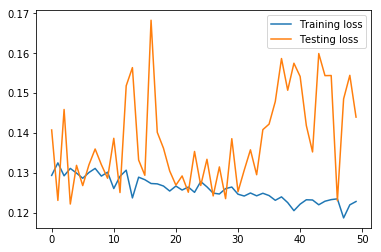

In [123]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [124]:
model.predict(X_test).mean()

0.07152803

In [34]:
X.T

0          1          2          3     \
Latitude                        41.867108  41.867108  41.862292  41.896282   
Longitude                      -87.654224 -87.654224 -87.648860 -87.655232   
NumMosquitos                     1.000000   2.000000   1.000000   1.000000   
BR                               1.000000   1.000000   1.000000   1.000000   
HZ                               1.000000   1.000000   1.000000   1.000000   
RA                               0.000000   0.000000   0.000000   0.000000   
TSRA                             0.000000   0.000000   0.000000   0.000000   
VCTS                             0.000000   0.000000   0.000000   0.000000   
FU                               0.000000   0.000000   0.000000   0.000000   
TS                               0.000000   0.000000   0.000000   0.000000   
DZ                               0.000000   0.000000   0.000000   0.000000   
BCFG                             0.000000   0.000000   0.000000   0.000000   
FG+                              0.000000   0.000000   0.000000   0.000000   
MIFG                             0.000000   0.000000   0.000000   0.000000   
FG                               0.000000   0.000000   0.000000   0.000000   
SQ                               0.000000   0.000000   0.000000   0.000000   
SN                               0.000000   0.000000   0.000000   0.000000   
VCFG                             0.000000   0.000000   0.000000   0.000000   
GR                               0.000000   0.000000   0.000000   0.000000   
TavgC                           24.166667  24.166667  24.166667  24.166667   
TmaxC                           31.111111  31.111111  31.111111  31.111111   
TminC                           16.944444  16.944444  16.944444  16.944444   
DewPointC                       14.722222  14.722222  14.722222  14.722222   
relative_humidity               55.614546  55.614546  55.614546  55.614546   
rain                             0.000000   0.000000   0.000000   0.000000   
ideal_environment                0.000000   0.000000   0.000000   0.000000   
ideal_feeding                    0.000000   0.000000   0.000000   0.000000   
photoperiod                     15.600000  15.600000  15.600000  15.600000   
TavgC_1_back                    18.333333  18.333333  18.333333  18.333333   
TavgC_2_back                    19.166667  19.166667  19.166667  19.166667   
...                                   ...        ...        ...        ...   
ideal_feeding_12_back            0.000000   0.000000   0.000000   0.000000   
ideal_feeding_13_back            0.000000   0.000000   0.000000   0.000000   
ideal_feeding_14_back            0.000000   0.000000   0.000000   0.000000   
photoperiod_1_back              15.583333  15.583333  15.583333  15.583333   
photoperiod_2_back              15.566667  15.566667  15.566667  15.566667   
photoperiod_3_back              15.550000  15.550000  15.550000  15.550000   
photoperiod_4_back              15.516667  15.516667  15.516667  15.516667   
photoperiod_5_back              15.483333  15.483333  15.483333  15.483333   
photoperiod_6_back              15.450000  15.450000  15.450000  15.450000   
photoperiod_7_back              15.433333  15.433333  15.433333  15.433333   
photoperiod_8_back              15.400000  15.400000  15.400000  15.400000   
photoperiod_9_back              15.366667  15.366667  15.366667  15.366667   
photoperiod_10_back             15.333333  15.333333  15.333333  15.333333   
photoperiod_11_back             15.300000  15.300000  15.300000  15.300000   
photoperiod_12_back             15.266667  15.266667  15.266667  15.266667   
photoperiod_13_back             15.233333  15.233333  15.233333  15.233333   
photoperiod_14_back             15.200000  15.200000  15.200000  15.200000   
Month_05                         1.000000   1.000000   1.000000   1.000000   
Month_06                         0.000000   0.000000   0.000000   0.000000   
Month_07                         0.000000   0.000000   0.00

In [ ]:
# ss = StandardScaler()
# pca = PCA()

# pipe = Pipeline([
#     ('ss', ss),
#     ('pca', PCA),
# ])

# pipeline = pipe.fit_transform(X)

# print(cross_val_score(lr,pipeline, y, cv=5).mean())